# Prática 1

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**



## Visualização e exploração de dados

### Associação entre variáveis

Considere os dados de 100 mil clientes de um banco no arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.


Analise as possíveis associações entre o sexo, idade, empresa, salário, saldo em conta corrente, saldo em conta poupança, saldo em investimento e devedor no cartão com a variável Inadimplente.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

pkgdir = '.\data'

# Dados banco - Leitura dos dados
dados = pd.read_csv(f'{pkgdir}\dados_banco.csv', index_col=0, decimal=',')

dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.0,0.0,1214.35,0
2,2,F,31,Pública,5134,532.09,0.0,0.0,1662.96,0
3,3,M,31,Pública,5286,719.91,0.0,0.0,2167.97,0
4,4,F,32,Privada,5534,547.47,0.0,0.0,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.0,0.0,1466.96,1


#### Descreva a associação entre sexo e inadimplência.


In [4]:
dados.loc[:,dados.columns != 'Cliente'].describe()

,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,31.83236,5513.453080,836.530683,2213.296334,1471.116085,2408.638706,0.24359
std,2.92772,392.083661,238.691071,5650.814769,3914.558428,1659.405630,0.42925
min,21.00000,4359.000000,-280.670000,0.000000,0.000000,0.000000,0.00000
25%,30.00000,5235.000000,675.290000,0.000000,0.000000,1100.242500,0.00000
50%,32.00000,5530.000000,835.050000,0.000000,0.000000,2463.965000,0.00000
75%,34.00000,5766.000000,996.560000,0.000000,0.000000,3602.510000,0.00000
max,56.00000,9080.000000,2340.650000,27329.110000,22803.560000,10281.780000,1.00000


In [5]:
# Tabela de dupla entrada
tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Sexo'])
tabela_dupla

Sexo,F,M
Inadimplente,,
0,31603,44038
1,10242,14117


In [7]:
tabela_dupla/tabela_dupla.sum()

Sexo,F,M
Inadimplente,,
0,0.75524,0.757252
1,0.24476,0.242748


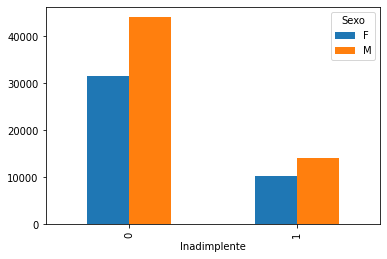

In [6]:
tabela_dupla.plot.bar()
plt.legend(title='Sexo')
plt.show()

#### Há associação entre idade e inadimplência?

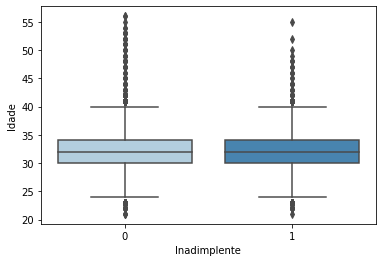

In [9]:
#import seaborn as sns
#sns.boxplot(y=dados["Idade"],x=dados["Inadimplente"], palette="Blues")
sns.boxplot(x='Inadimplente', y='Idade', data=dados, palette="Blues")

#### Há associação entre empresa e inadimplência?

In [10]:
# Tabela de dupla entrada
tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Empresa'])
tabela_dupla

Empresa,Autônomo,Privada,Pública
Inadimplente,,,
0,8345,46144,21152
1,5861,15480,3018


In [11]:
tabela_dupla/tabela_dupla.sum()

Empresa,Autônomo,Privada,Pública
Inadimplente,,,
0,0.587428,0.748799,0.875134
1,0.412572,0.251201,0.124866


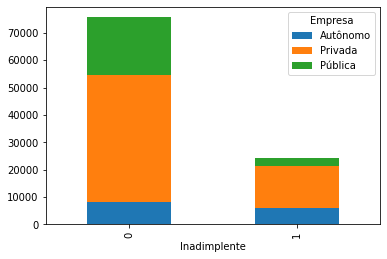

In [15]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Empresa')
plt.show()

#### Verifique a associação entre salário e inadimplência.

<AxesSubplot:xlabel='Inadimplente', ylabel='Salario'>

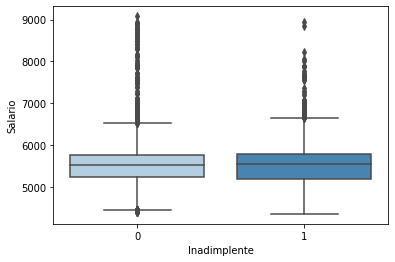

In [23]:
sns.boxplot(x=dados['Inadimplente'],
        y=dados['Salario'],
        #hue=dados['Empresa'],
        palette="Blues")

#### Verifique a associação entre saldo em conta corrente e inadimplência.

<AxesSubplot:xlabel='Inadimplente', ylabel='Saldo_cc'>

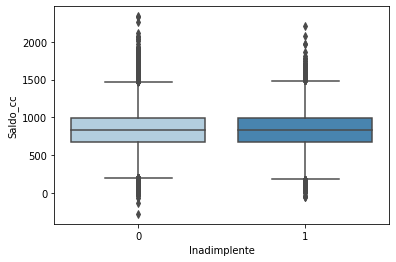

In [26]:
sns.boxplot(data=dados,
        x='Inadimplente',
        y='Saldo_cc',
        palette="Blues")

#### Há associação entre saldo em conta poupança e inadimplência?

<AxesSubplot:xlabel='Inadimplente', ylabel='Saldo_poupança'>

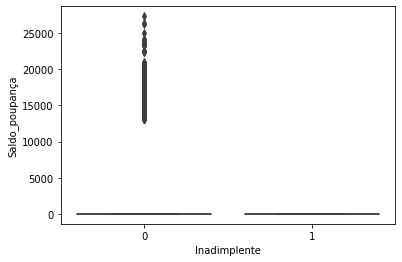

In [29]:
sns.boxplot(data=dados,
        x='Inadimplente',
        y='Saldo_poupança')

#### Há associação entre devedor no cartão e inadimplência?

<AxesSubplot:xlabel='Inadimplente', ylabel='Devedor_cartao'>

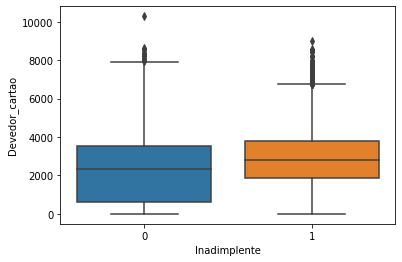

In [30]:
sns.boxplot(data=dados,
        x='Inadimplente',
        y='Devedor_cartao')

Como não fizemos análises inferenciais, não podemos concluir estatisticamente sobre as associações. Porém, com base nas análises de visualização e exploração de dados, parece existir associação entre inadimplência e tipo de empresa somente.